In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import  pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('student-por.csv', sep=';')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
missing_values = df.isnull().sum()

print("Missing Values Count per Column:")
print(missing_values)



Missing Values Count per Column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

# Loop through the list of columns and display the value counts for each one
for column in columns:
    counts = df[column].value_counts()
    print(column + ':')
    print(counts)
    print()

school:
school
GP    423
MS    226
Name: count, dtype: int64

sex:
sex
F    383
M    266
Name: count, dtype: int64

age:
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

address:
address
U    452
R    197
Name: count, dtype: int64

famsize:
famsize
GT3    457
LE3    192
Name: count, dtype: int64

Pstatus:
Pstatus
T    569
A     80
Name: count, dtype: int64

Medu:
Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

Fedu:
Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

Mjob:
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

Fjob:
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

reason:
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

guardian:
guardian
mother    455
father    153
other      41
N

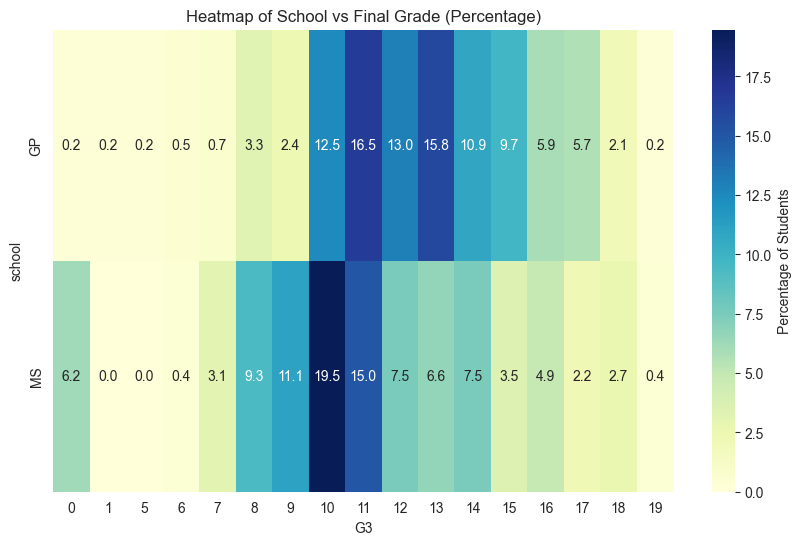

In [14]:
pivot_table = df.pivot_table(index='school', columns='G3', aggfunc='size', fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage of Students'})
plt.title('Heatmap of School vs Final Grade (Percentage)')
plt.show()

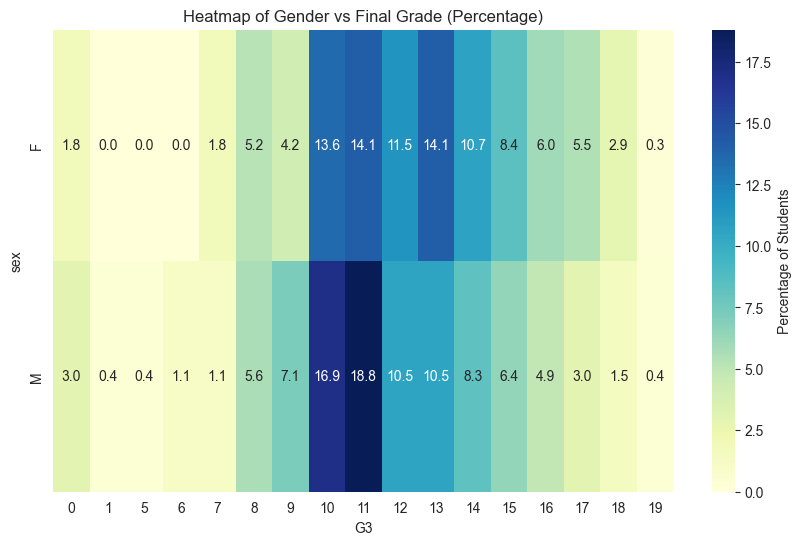

In [15]:
pivot_table = df.pivot_table(index='sex', columns='G3', aggfunc='size', fill_value=0)


pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage of Students'})
plt.title('Heatmap of Gender vs Final Grade (Percentage)')
plt.show()

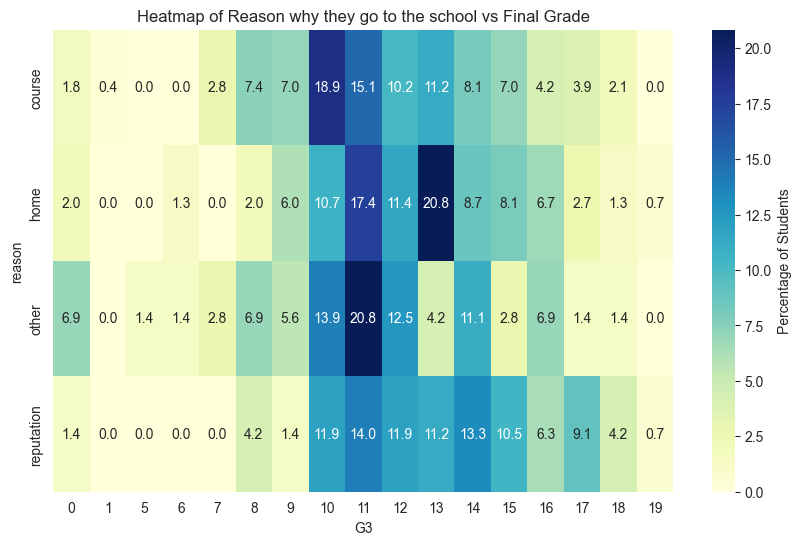

In [16]:
pivot_table = df.pivot_table(index='reason', columns='G3', aggfunc='size', fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage of Students'})
plt.title('Heatmap of Reason why they go to the school vs Final Grade')
plt.show()

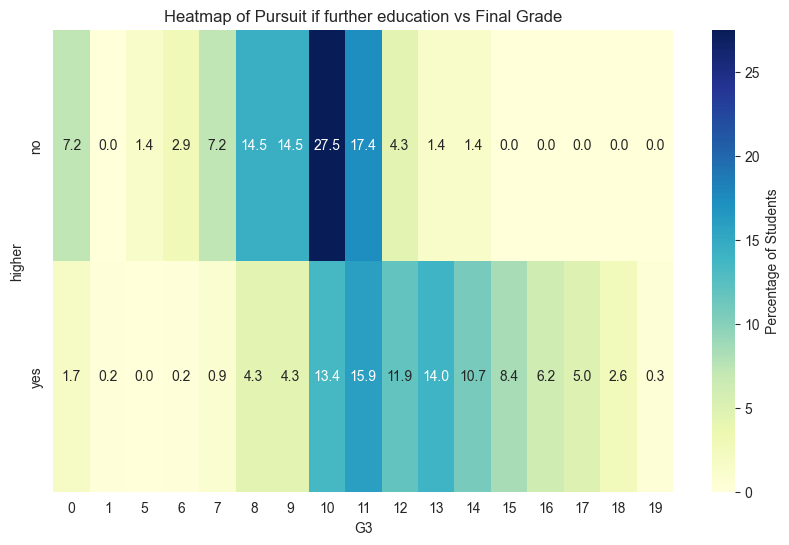

In [17]:
pivot_table = df.pivot_table(index='higher', columns='G3', aggfunc='size', fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage of Students'})
plt.title('Heatmap of Pursuit if further education vs Final Grade')
plt.show()

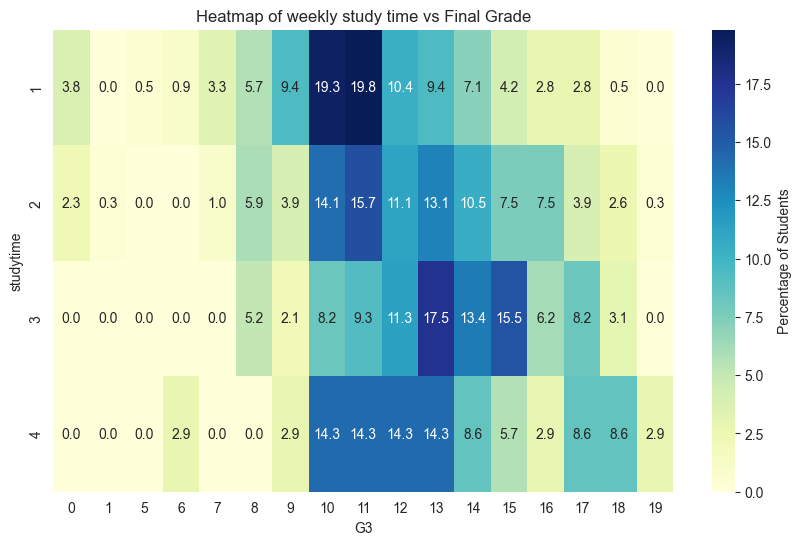

In [18]:
pivot_table = df.pivot_table(index='studytime', columns='G3', aggfunc='size', fill_value=0)

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage of Students'})
plt.title('Heatmap of weekly study time vs Final Grade')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
# List of columns to label encode
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                     'famsup', 'paid', 'activities', 'nursery', 'higher', 
                     'internet', 'romantic']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
print(df)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     famrel  freetime  goou

In [21]:
# Split the data into features and target
X = df.drop('G3', axis=1)
y = df['G3']

In [23]:
# Standardize numerical features
scaler = StandardScaler()
X[X.select_dtypes(['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(['float64', 'int64']))


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [25]:
X_train.shape

(486, 32)

In [26]:
# The Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)  
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.007)

In [51]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
16/16 [==============================] - 4s 34ms/step - loss: 1.8923 - mae: 1.0192 - val_loss: 5.6086 - val_mae: 1.3879
Epoch 2/30
16/16 [==============================] - 0s 9ms/step - loss: 1.8455 - mae: 1.0181 - val_loss: 3.9205 - val_mae: 1.0562
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 1.6088 - mae: 0.9727 - val_loss: 3.9620 - val_mae: 1.0808
Epoch 4/30
16/16 [==============================] - 0s 9ms/step - loss: 1.3735 - mae: 0.9116 - val_loss: 3.3880 - val_mae: 1.0421
Epoch 5/30
16/16 [==============================] - 0s 9ms/step - loss: 1.4137 - mae: 0.8983 - val_loss: 3.4760 - val_mae: 0.9934
Epoch 6/30
16/16 [==============================] - 0s 15ms/step - loss: 1.4942 - mae: 0.9483 - val_loss: 2.8128 - val_mae: 0.8976
Epoch 7/30
16/16 [==============================] - 0s 9ms/step - loss: 1.7100 - mae: 1.0357 - val_loss: 2.8015 - val_mae: 0.8828
Epoch 8/30
16/16 [==============================] - 0s 9ms/step - loss: 1.7156 - mae: 1.

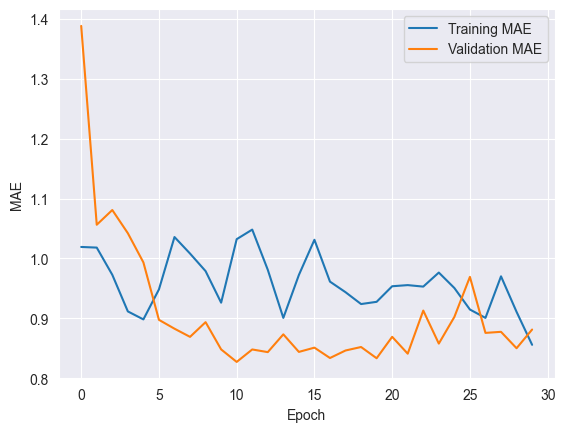

In [53]:
# Plot the training history
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [54]:
# Test set
predictions = model.predict(X_test)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})

print(predictions_df)

6/6 [==============================] - 0s 2ms/step
     Actual  Predicted
636      19  17.115318
220      12  11.635224
594      18  16.662628
429      11  10.713056
72       11  12.210574
..      ...        ...
457      11  10.683753
328      13  13.164860
320      13  12.584914
289      17  14.738673
140      10   9.387128

[163 rows x 2 columns]


In [55]:

# Calculate the absolute differences between actual and predicted values
absolute_differences = np.abs(predictions_df['Actual'] - predictions_df['Predicted'])

average_difference = absolute_differences.mean()

print(f'Average Difference between Actual and Predicted: {average_difference}')

Average Difference between Actual and Predicted: 0.8813716619292651
